### Install yfinance

In [1]:
!pip install yfinance

  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     ------------------- ---------------- 524.3/949.2 kB 616.2 kB/s eta 0:00:01
     ----


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing Required Libraries

In [2]:
import yfinance as yf 
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.linear_model import LinearRegression

###  Load Stock Data

In [3]:
# Download stock price data (e.g., for Tesla) 
data = yf.download('TSLA', start='2015-01-01', end='2020-12-31') 
data.head()

C:\Users\priya\AppData\Local\Temp\ipykernel_11944\1702832798.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('TSLA', start='2015-01-01', end='2020-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


###  Preprocess Data

In [11]:
data.reset_index(inplace=True)
data['day_index'] = (data['Date'] - data['Date'].min()).dt.days  # numeric index for regression

### Create a Time Series Plot

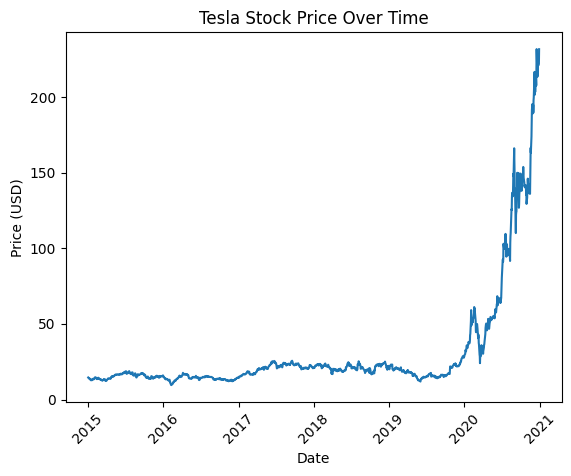

In [13]:
plt.plot(data['Date'], data['Close'], label="Tesla Close Price")
plt.title("Tesla Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45) 
plt.show()

### Perform Regression Analysis

In [14]:
# Create a linear regression model to predict future stock prices 
X = pd.to_numeric(data['Date'].map(pd.Timestamp.timestamp)).values.reshape(-1, 1)  # Convert dates to numeric 
y = data['Close'].values  # Target: closing prices 
 
model = LinearRegression() 
model.fit(X, y) 
 
# Predict stock prices 
y_pred = model.predict(X)

###  Regression Plot

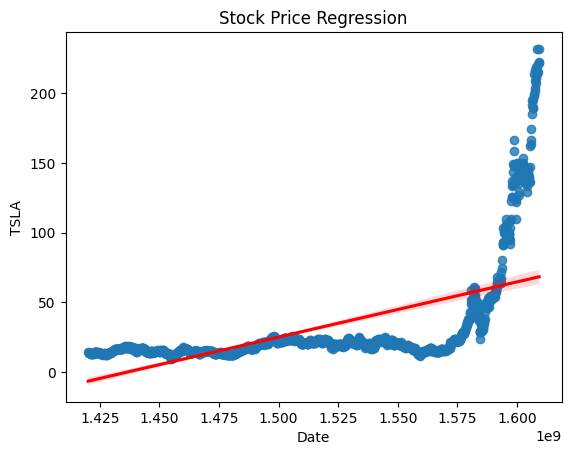

In [15]:
sns.regplot(x=pd.to_numeric(data['Date'].map(pd.Timestamp.timestamp)), 
             y='Close', data=data, line_kws={'color': 'red'}) 
plt.title('Stock Price Regression') 
plt.show() 

### Customize Regression Line

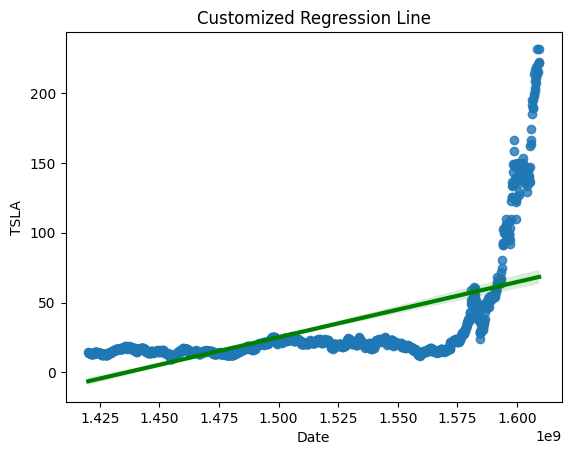

In [17]:
sns.regplot(x=pd.to_numeric(data['Date'].map(pd.Timestamp.timestamp)), 
            y='Close', data=data, 
            line_kws={'color': 'green', 'linewidth': 3}) 
plt.title('Customized Regression Line') 
plt.show() 

### Residual Plot

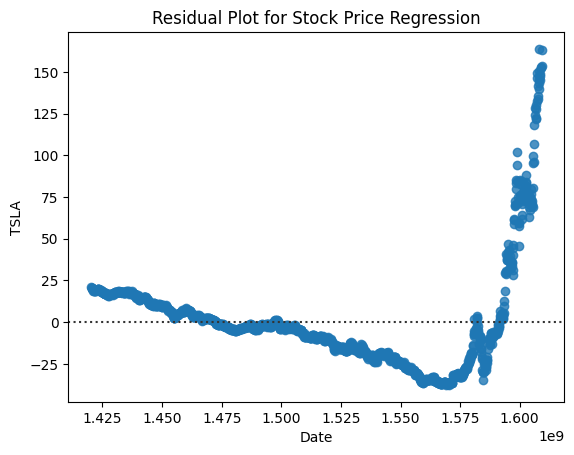

In [22]:
sns.residplot(x=pd.to_numeric(data['Date'].map(pd.Timestamp.timestamp)), 
              y='Close', data=data) 
plt.title('Residual Plot for Stock Price Regression') 
plt.show() 

### Predict Future Prices

In [25]:
# Create a new set of dates for prediction (for the next 30 days) 
future_dates = pd.date_range(start='2021-01-01', periods=30, freq='D') 
 
# Convert these dates to numeric timestamps 
future_dates_numeric = pd.to_numeric(future_dates.map(pd.Timestamp.timestamp)).values.reshape(-1, 1) 
 
# Make predictions 
future_predictions = model.predict(future_dates_numeric) 
 
# Display predictions 
predicted_stock_prices = pd.DataFrame({'Date': future_dates, 'Predicted Price': future_predictions.ravel()}) 
print(predicted_stock_prices) 

         Date  Predicted Price
0  2021-01-01        68.415773
1  2021-01-02        68.449927
2  2021-01-03        68.484082
3  2021-01-04        68.518236
4  2021-01-05        68.552391
5  2021-01-06        68.586545
6  2021-01-07        68.620699
7  2021-01-08        68.654854
8  2021-01-09        68.689008
9  2021-01-10        68.723163
10 2021-01-11        68.757317
11 2021-01-12        68.791471
12 2021-01-13        68.825626
13 2021-01-14        68.859780
14 2021-01-15        68.893935
15 2021-01-16        68.928089
16 2021-01-17        68.962243
17 2021-01-18        68.996398
18 2021-01-19        69.030552
19 2021-01-20        69.064707
20 2021-01-21        69.098861
21 2021-01-22        69.133015
22 2021-01-23        69.167170
23 2021-01-24        69.201324
24 2021-01-25        69.235479
25 2021-01-26        69.269633
26 2021-01-27        69.303787
27 2021-01-28        69.337942
28 2021-01-29        69.372096
29 2021-01-30        69.406251


### Model Evaluation

In [26]:
# Evaluate the model's performance (R-squared) 
r2 = model.score(X, y)
print(f'R-squared: {r2}')

R-squared: 0.3385208683699502
